In [1]:
import rld
import pickle

pix_size = 6. # arcseconds

fp = open('Example_Stack.pkl','rb')
Example_Stack = pickle.load(fp)
bin_edge = pickle.load(fp)
fp.close()

In [5]:
Example_Stack.shape,bin_edge.shape

((133, 133), (134,))

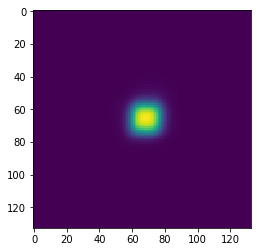

In [6]:
plt.imshow(Example_Stack)

In [4]:
bin_edge

array([-4.  , -3.94, -3.88, -3.82, -3.76, -3.7 , -3.64, -3.58, -3.52,
       -3.46, -3.4 , -3.34, -3.28, -3.22, -3.16, -3.1 , -3.04, -2.98,
       -2.92, -2.86, -2.8 , -2.74, -2.68, -2.62, -2.56, -2.5 , -2.44,
       -2.38, -2.32, -2.26, -2.2 , -2.14, -2.08, -2.02, -1.96, -1.9 ,
       -1.84, -1.78, -1.72, -1.66, -1.6 , -1.54, -1.48, -1.42, -1.36,
       -1.3 , -1.24, -1.18, -1.12, -1.06, -1.  , -0.94, -0.88, -0.82,
       -0.76, -0.7 , -0.64, -0.58, -0.52, -0.46, -0.4 , -0.34, -0.28,
       -0.22, -0.16, -0.1 , -0.04,  0.02,  0.08,  0.14,  0.2 ,  0.26,
        0.32,  0.38,  0.44,  0.5 ,  0.56,  0.62,  0.68,  0.74,  0.8 ,
        0.86,  0.92,  0.98,  1.04,  1.1 ,  1.16,  1.22,  1.28,  1.34,
        1.4 ,  1.46,  1.52,  1.58,  1.64,  1.7 ,  1.76,  1.82,  1.88,
        1.94,  2.  ,  2.06,  2.12,  2.18,  2.24,  2.3 ,  2.36,  2.42,
        2.48,  2.54,  2.6 ,  2.66,  2.72,  2.78,  2.84,  2.9 ,  2.96,
        3.02,  3.08,  3.14,  3.2 ,  3.26,  3.32,  3.38,  3.44,  3.5 ,
        3.56,  3.62,

In [7]:
#build a pixel shape

apixel = np.zeros(np.shape(Example_Stack))
bin_edge = bin_edge*pix_size
xx,yy = np.meshgrid((bin_edge[1:] + bin_edge[:-1])/2.0,(bin_edge[1:] + bin_edge[:-1])/2.0)

ii = np.where((xx<0.5*pix_size)&(xx>=-0.5*pix_size)&(yy>=-0.5*pix_size)&(yy<0.5*pix_size))
apixel[ii] = 1.0

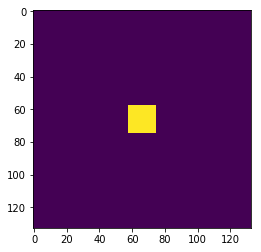

In [8]:
plt.imshow(apixel)

In [23]:
np.sum(Deconvolved_Stack/np.sum(apixel)),np.sum(apixel)

(378.42336989682212, 289.0)

6.65002379968
6.2708503438
6.01780311185
5.83622888843
5.70136458645
5.59899174722
5.52002666465
5.45832726779
5.40959154978
5.37073054773
5.33948335811
5.31416897548
5.2935208096
5.27657345523
5.2625835735
5.25097361394
5.24129115834
5.23317914892
5.22635382606
5.22058820786
5.21569960569
5.21154011312
5.20798930743
5.20494861207
5.20233691554


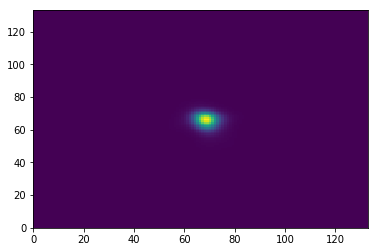

In [21]:
Deconvolved_Stack = rld.rld(Example_Stack,apixel,niter=25)

plt.pcolormesh(Deconvolved_Stack)


In [30]:
apixel.shape

(133, 133)

In [25]:
from scipy.signal import convolve2d

x, y = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
d = np.sqrt(x*x+y*y)
sigma, mu = 1.0, 0.0
g = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )

c = convolve2d(Example_Stack,apixel,mode='same')

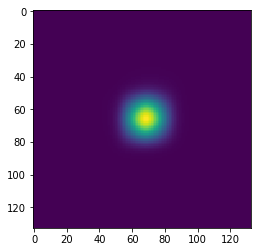

In [26]:
plt.imshow(c)

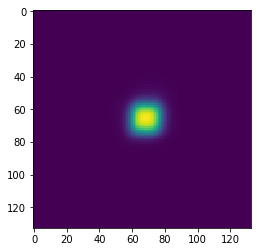

In [27]:
plt.imshow(Example_Stack)

In [29]:
np.where(Example_Stack==np.max(Example_Stack)),np.where(c==np.max(c))

((array([65]), array([70])), (array([66]), array([68])))

In [31]:
np.where(Deconvolved_Stack==np.max(Deconvolved_Stack))

(array([66]), array([68]))